In [5]:
from keras.models import *
from keras.layers import *

In [6]:
from captcha.image import ImageCaptcha
import matplotlib.pyplot as plt
import numpy as np
import random
from PIL import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import string
characters = string.digits +'+-='
print(characters)
import pandas as pd

width, height, n_len, n_class = 170, 80, 4, len(characters)+1

0123456789+-=


In [12]:

def gen(batch_size=128):
    X = np.zeros((batch_size, width, height, 3), dtype=np.uint8)
    y = np.zeros((batch_size, n_len,n_class), dtype=np.uint8)
    while True:
        generator = ImageCaptcha(width=width, height=height)
        for i in range(batch_size):
            random_str = ''.join([random.choice(characters) for j in range(4)])
            X[i] = np.array(generator.generate_image(random_str)).transpose(1, 0, 2)
            f = [int(characters.find(x)) for x in random_str]
            t = np.zeros((n_len,n_class), dtype=np.uint8)
            for index,j in enumerate(f):
                t[index,j] = 1
            y[i] = t
        yield X,y


In [7]:
character = string.digits
def gen(batch_size=128):
    X = np.zeros((batch_size, width, height, 3), dtype=np.uint8)
    y = np.zeros((batch_size, n_len,n_class), dtype=np.uint8)
    while True:
        generator = ImageCaptcha(width=width, height=height)
        for i in range(batch_size):
            random_str = random.choice(character) + random.choice(['+','-']) + random.choice(character)+'='
            X[i] = np.array(generator.generate_image(random_str)).transpose(1, 0, 2)
            f = [int(characters.find(x)) for x in random_str]
            t = np.zeros((n_len,n_class), dtype=np.uint8)
            for index,j in enumerate(f):
                t[index,j] = 1
            y[i] = t
        yield X,y

In [13]:
next(gen(1))[1]

array([[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]], dtype=uint8)

In [21]:
input_tensor = Input(shape=(170,80,3))
x = Conv2D(32,(2,2),padding='same',activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPool2D(2,2)(x)
x = BatchNormalization()(x)
x = Conv2D(3,(2,2),padding='same',activation='relu')(x)
conv_shape = x.get_shape()
x = Reshape((4,-1))(x)
x = Dropout(0.1)(x)
x = Bidirectional(LSTM(218,return_sequences=True),merge_mode='sum')(x)
x = Dense(14)(x)
x = BatchNormalization()(x)
x = Activation('softmax')(x)
model = Model(input_tensor,x)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 170, 80, 3)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 170, 80, 32)       416       
_________________________________________________________________
batch_normalization_14 (Batc (None, 170, 80, 32)       128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 85, 40, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 85, 40, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 85, 40, 3)         387       
_________________________________________________________________
reshape_6 (Reshape)          (None, 4, 2550)           0         
__________

In [1]:
from keras.models import load_model
model = load_model('model.h5')

/Users/wangqiang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [187]:
model.fit_generator(gen(1), samples_per_epoch=51200, nb_epoch=1,
                    validation_data=gen(1), nb_val_samples=1280) 

Epoch 1/1
    1/51200 [..............................] - ETA: 1:54:49 - loss: 0.0128 - acc: 1.0000

/Users/wangqiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/wangqiang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., steps_per_epoch=51200, epochs=1, validation_steps=1280)`
  


51200/51200 [==============================] - 5774s 113ms/step - loss: 0.0781 - acc: 0.9758 - val_loss: 0.2480 - val_acc: 0.9191


In [24]:
predict = model.predict_generator(generator=gen(1),steps=1)

In [23]:
model.save('model.h5')

In [10]:
X,y = next(gen(1))

In [14]:
X.shape

(1, 170, 80, 3)

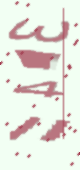

In [15]:
Image.fromarray(X.reshape(170,80,3))

In [84]:
y_re = model.predict(X,steps=1)

In [2]:
from PIL import Image


In [9]:
for X,y in gen(1):
    data_x = Image.fromarray(X)
    a = ''.join([characters[i] for i in [np.argmax(i) for i in y[0]]])
    y_re = model.predict(X,steps=1)
    b = [np.argmax(i) for i in y_re[0]]
    b = ''.join([characters[i] for i in b])
    print('y:   ',a)
    print('y_pred:    ',b)
    print('--------')
    if a==b:
        break

TypeError: Cannot handle this data type

In [186]:
0.92**4

0.7163929600000001